# COVID-19 Argentina por RJC

In [242]:
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import matplotlib.pyplot as plt
import seaborn as sns  # This allows us to easily and beautifully plot

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

### Abro archivo con los datos del gobierno, Tasa diaria de contagios y muertos, total de recuperados y de tests

In [243]:
f = 'Covid19_Arg.txt'    # Path to file containing the file
df = pd.read_csv(f, comment='#')    # Read csv file with comma sepparation
df.tail(10)

,Fecha,Contagios,Muertos,Recuperados_tot,Tests
198,9/19/2020,9276,138,"478,077","1,707,947"
199,9/20/2020,8431,260,"488,231","1,729,040"
200,9/21/2020,8782,429,"498,379","1,765,069"
201,9/22/2020,12027,470,"508,563","1,790,835"
202,9/23/2020,12625,424,"517,228","1,815,738"
203,9/24/2020,13467,389,"525,486","1,842,991"
204,9/25/2020,12969,441,"536,589","1,868,089"
205,9/26/2020,11249,337,"546,924","1,890,190"
206,9/27/2020,8841,206,"556,489","1,905,361"
207,9/28/2020,11807,364,"565,935","1,926,717"


### Separo por comas y indexto los dias a la tabla para graficar facilmente

In [244]:
df.set_index(pd.DatetimeIndex(df['Fecha']),inplace=True)
df.drop('Fecha', axis=1, inplace=True)
#df['Recuperados_tot'] = pd.to_numeric(df['Recuperados_tot'])

df.tail(10) #ultimos 10 valores

,Contagios,Muertos,Recuperados_tot,Tests
Fecha,,,,
2020-09-19,9276,138,"478,077","1,707,947"
2020-09-20,8431,260,"488,231","1,729,040"
2020-09-21,8782,429,"498,379","1,765,069"
2020-09-22,12027,470,"508,563","1,790,835"
2020-09-23,12625,424,"517,228","1,815,738"
2020-09-24,13467,389,"525,486","1,842,991"
2020-09-25,12969,441,"536,589","1,868,089"
2020-09-26,11249,337,"546,924","1,890,190"
2020-09-27,8841,206,"556,489","1,905,361"


### Calculo la tasa diaria de recuperados, activos y tests

In [245]:
df['Recuperados'] = df['Recuperados_tot'].diff()
df['Tests_diario'] = df['Tests'].diff()
df['Activos']=df['Contagios']-df['Recuperados']-df['Muertos']
df['Activos'] = pd.to_numeric(df['Activos'])
df.tail(10)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos
Fecha,,,,,,,
2020-09-19,9276,138,"478,077","1,707,947","10,791","25,698","-1,653"
2020-09-20,8431,260,"488,231","1,729,040","10,154","21,093","-1,983"
2020-09-21,8782,429,"498,379","1,765,069","10,148","36,029","-1,795"
2020-09-22,12027,470,"508,563","1,790,835","10,184","25,766","1,373"
2020-09-23,12625,424,"517,228","1,815,738","8,665","24,903","3,536"
2020-09-24,13467,389,"525,486","1,842,991","8,258","27,253","4,820"
2020-09-25,12969,441,"536,589","1,868,089","11,103","25,098","1,425"
2020-09-26,11249,337,"546,924","1,890,190","10,335","22,101",577
2020-09-27,8841,206,"556,489","1,905,361","9,565","15,171",-930


### Calculo el total de contagios, muertos y activos

In [246]:
df['Contagios_tot'] = df['Contagios'].cumsum()
df['Muertos_tot'] = df['Muertos'].cumsum()
df['Activos_tot']=df['Contagios_tot']-df['Recuperados_tot']-df['Muertos_tot']

pd.options.display.float_format = '{:,.0f}'.format #en enteros sin coma
df.tail(10)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot
Fecha,,,,,,,,,,
2020-09-19,9276,138,"478,077","1,707,947","10,791","25,698","-1,653",622934,12793,"132,064"
2020-09-20,8431,260,"488,231","1,729,040","10,154","21,093","-1,983",631365,13053,"130,081"
2020-09-21,8782,429,"498,379","1,765,069","10,148","36,029","-1,795",640147,13482,"128,286"
2020-09-22,12027,470,"508,563","1,790,835","10,184","25,766","1,373",652174,13952,"129,659"
2020-09-23,12625,424,"517,228","1,815,738","8,665","24,903","3,536",664799,14376,"133,195"
2020-09-24,13467,389,"525,486","1,842,991","8,258","27,253","4,820",678266,14765,"138,015"
2020-09-25,12969,441,"536,589","1,868,089","11,103","25,098","1,425",691235,15206,"139,440"
2020-09-26,11249,337,"546,924","1,890,190","10,335","22,101",577,702484,15543,"140,017"
2020-09-27,8841,206,"556,489","1,905,361","9,565","15,171",-930,711325,15749,"139,087"


### Grafico de tasa diaria

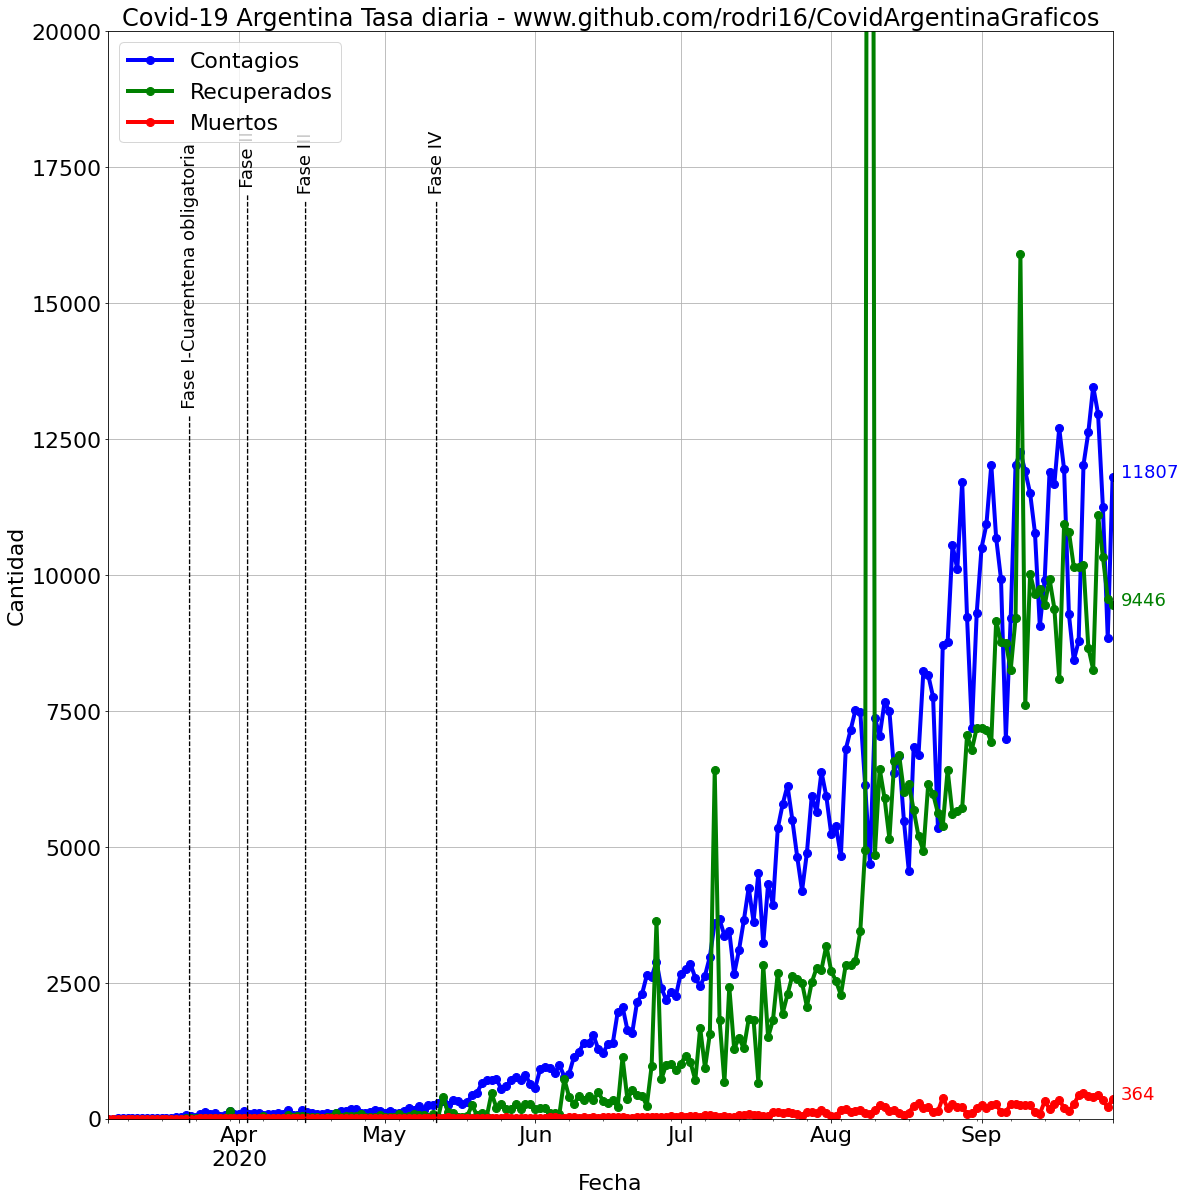

In [247]:
ax=df.plot(y=['Contagios','Recuperados','Muertos'], color=['blue',"green",'red'],legend='true',style='-',grid='on',figsize=(18,20),linewidth=4, marker='o', markersize=8, fontsize=22)

plt.title('Covid-19 Argentina Tasa diaria - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.legend(['Contagios', 'Recuperados',"Muertos"],loc='upper left', fontsize=22);
plt.ylabel('Cantidad', fontsize=22)
plt.xlabel('Fecha', fontsize=22)
#ax.text('2020-4-2',280,'https://github.com/rodri16/CovidArgentinaGraficos',fontsize=10)
#agrega ultimo numero
#for var in (df.Contagios,df.Recuperados,df.Muertos):
#    plt.annotate('%d' % var.iloc[-1], xy=(1, var.iloc[-1]), xytext=(8, 0), 
#                 xycoords=('axes fraction', 'data'), textcoords='offset points')
    
plt.annotate('%d' % df.Contagios.iloc[-1], xy=(1, df.Contagios.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='blue',size=18)
plt.annotate('%d' % df.Recuperados.iloc[-1], xy=(1, df.Recuperados.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='green',size=18)
plt.annotate('%d' % df.Muertos.iloc[-1], xy=(1, df.Muertos.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='red',size=18)

    # Add labels to the plot
style = dict(size=18, color='black')    
#Texto de la cuarentena obligatoria
ax.text('2020-3-20', 10, "------------------------------------------------------------------------------------------------------------- Fase I-Cuarentena obligatoria",rotation=90, **style)
#Texto de la Fase II
ax.text('2020-4-1', 10, "----------------------------------------------------------------------------------------------------------------------------------------------- Fase II",rotation=90, **style)
#Texto de la Fase III
ax.text('2020-4-13', 10, "---------------------------------------------------------------------------------------------------------------------------------------------- Fase III",rotation=90, **style)
#Texto de la Fase IV
ax.text('2020-5-10', 10, "---------------------------------------------------------------------------------------------------------------------------------------------- Fase IV",rotation=90, **style)


#valor minimo eje y = 0
plt.gca().set_ylim(bottom=0,top=20000)


#Salvo el grafico con la ultima fecha
name='Graficos/Septiembre/TasaDiariaLine_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name, bits=16)

In [248]:
#ax=df.plot(y=['Contagios','Recuperados','Muertos'], legend='true',style='-',logy="sym",grid='on',figsize=(11,8),linewidth=3, marker='o')


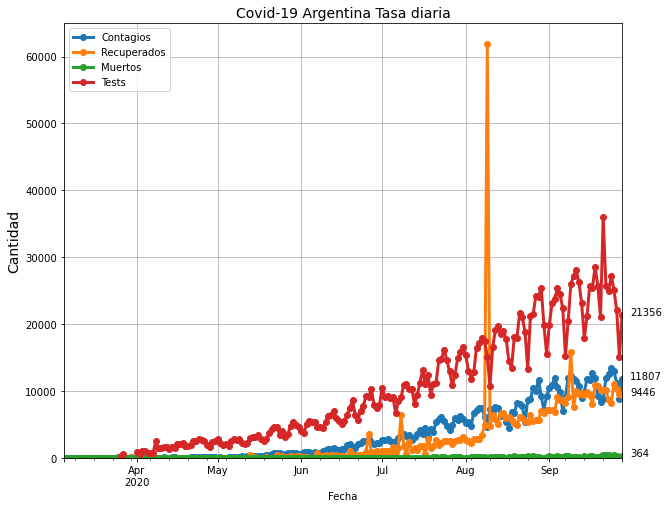

In [249]:
#agrego los tests pero no se ve nada (mejor en logaritmico)
ax=df.plot(y=['Contagios','Recuperados','Muertos','Tests_diario'], legend='true',style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')

plt.title('Covid-19 Argentina Tasa diaria',fontsize=14)
plt.legend(['Contagios', 'Recuperados',"Muertos","Tests"],loc='upper left');
plt.ylabel('Cantidad', fontsize=14)

#agrega ultimo numero
for var in (df.Contagios,df.Recuperados,df.Muertos,df.Tests_diario):
    plt.annotate('%d' % var.iloc[-1], xy=(1, var.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
    
#valor mininmo en y = 0
plt.gca().set_ylim(bottom=0)

#salvo grafico
name='Graficos/TasaDiariaFullLine_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Grafico de barras de los tests diarias

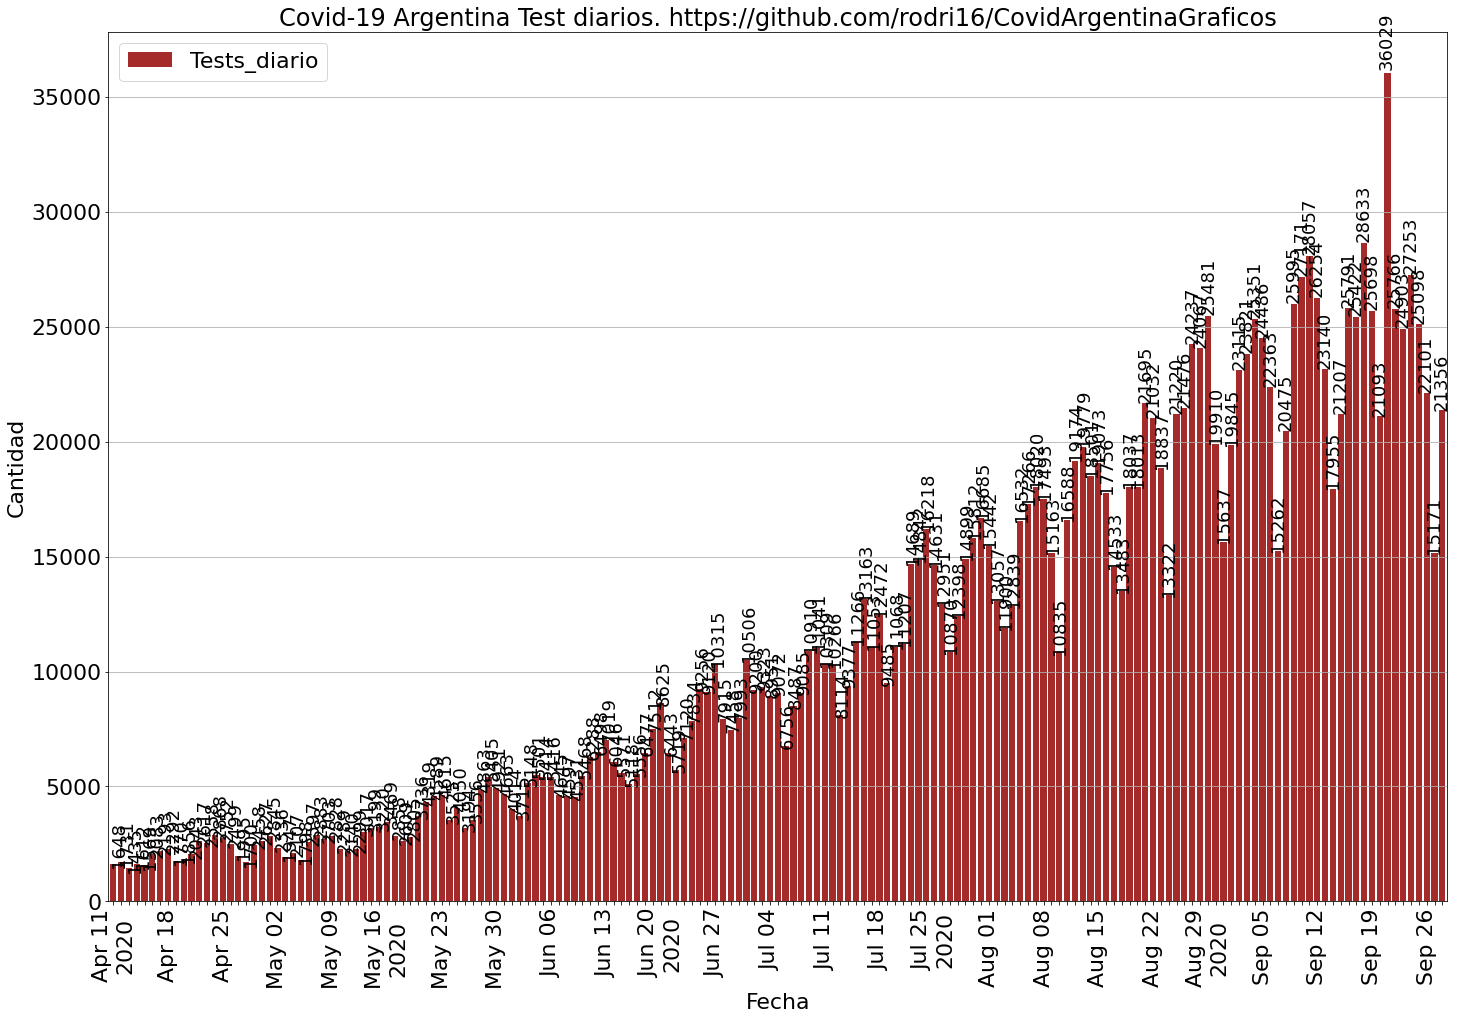

In [250]:
ax=df[df.index > '2020-4-10'].Tests_diario.plot.bar(color=['brown'],width=0.8, legend='true',figsize=(24,16), fontsize=22)

#arreglo el formato de la fecha
#plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df[df.index > '2020-4-10'].index.to_series().dt.strftime("%d %b")))#arregla la fecha

# Make most of the ticklabels empty so the labels don't get too crowded
import matplotlib.ticker as ticker
ticklabels = ['']*len(df[df.index > '2020-4-10'].index)
# Every 7th ticklable shows the month and day
ticklabels[::7] = [item.strftime('%b %d') for item in df[df.index > '2020-4-10'].index[::7]]
# Every 35th ticklabel includes the year
ticklabels[::35] = [item.strftime('%b %d\n%Y') for item in df[df.index > '2020-4-10'].index[::35]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

#agrego grid
plt.grid(axis='y')
plt.legend(fontsize=22,loc='upper left')
plt.xlabel('Fecha',fontsize=22)
plt.title('Covid-19 Argentina Test diarios. https://github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.ylabel('Cantidad', fontsize=22)

#numeros arriba de la barra
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.009),rotation=90, fontsize=18)

    #salvo grafico
name='Graficos/Septiembre/TestDiarioBar_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico total contagios y Activos

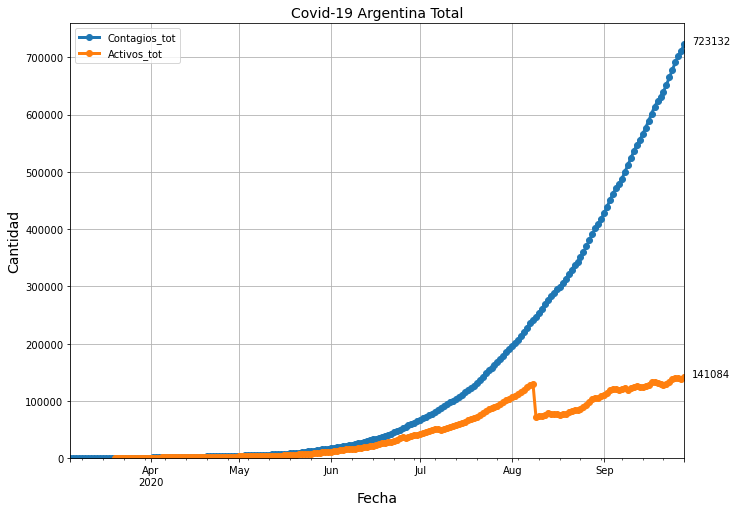

In [251]:
ax=df.plot(y=['Contagios_tot','Activos_tot'], style='-',grid='on',figsize=(11,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

#agrega ultimo numero
for var in (df.Contagios_tot,df.Activos_tot):
    plt.annotate('%d' % var.iloc[-1], xy=(1, var.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

#valor mininmo en y = 0
plt.gca().set_ylim(bottom=0)

#salvo grafico
name='Graficos/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Agrego total Muertos

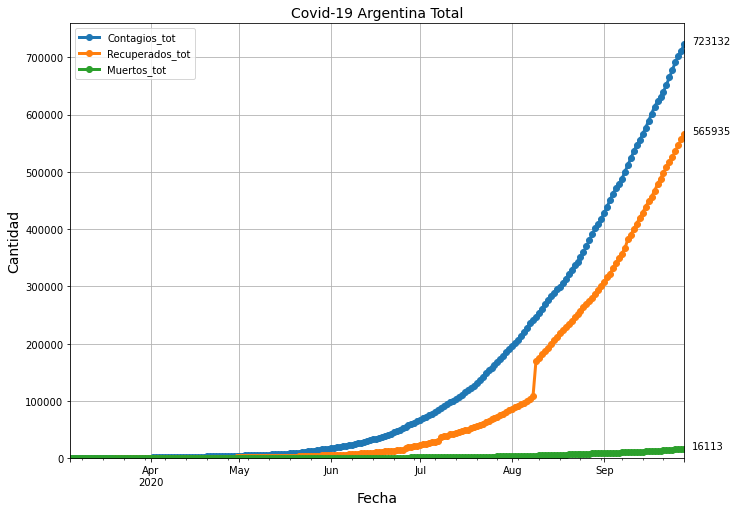

In [252]:
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot'], style='-',grid='on',figsize=(11,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend(loc='upper left');
#numeros arriba de la barra
#for p in ax.patches:
#    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#agrega ultimo numero
for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

#valor mininmo en y = 0
plt.gca().set_ylim(bottom=0)

name='Graficos/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Grafico Totales (el mas completo!!)

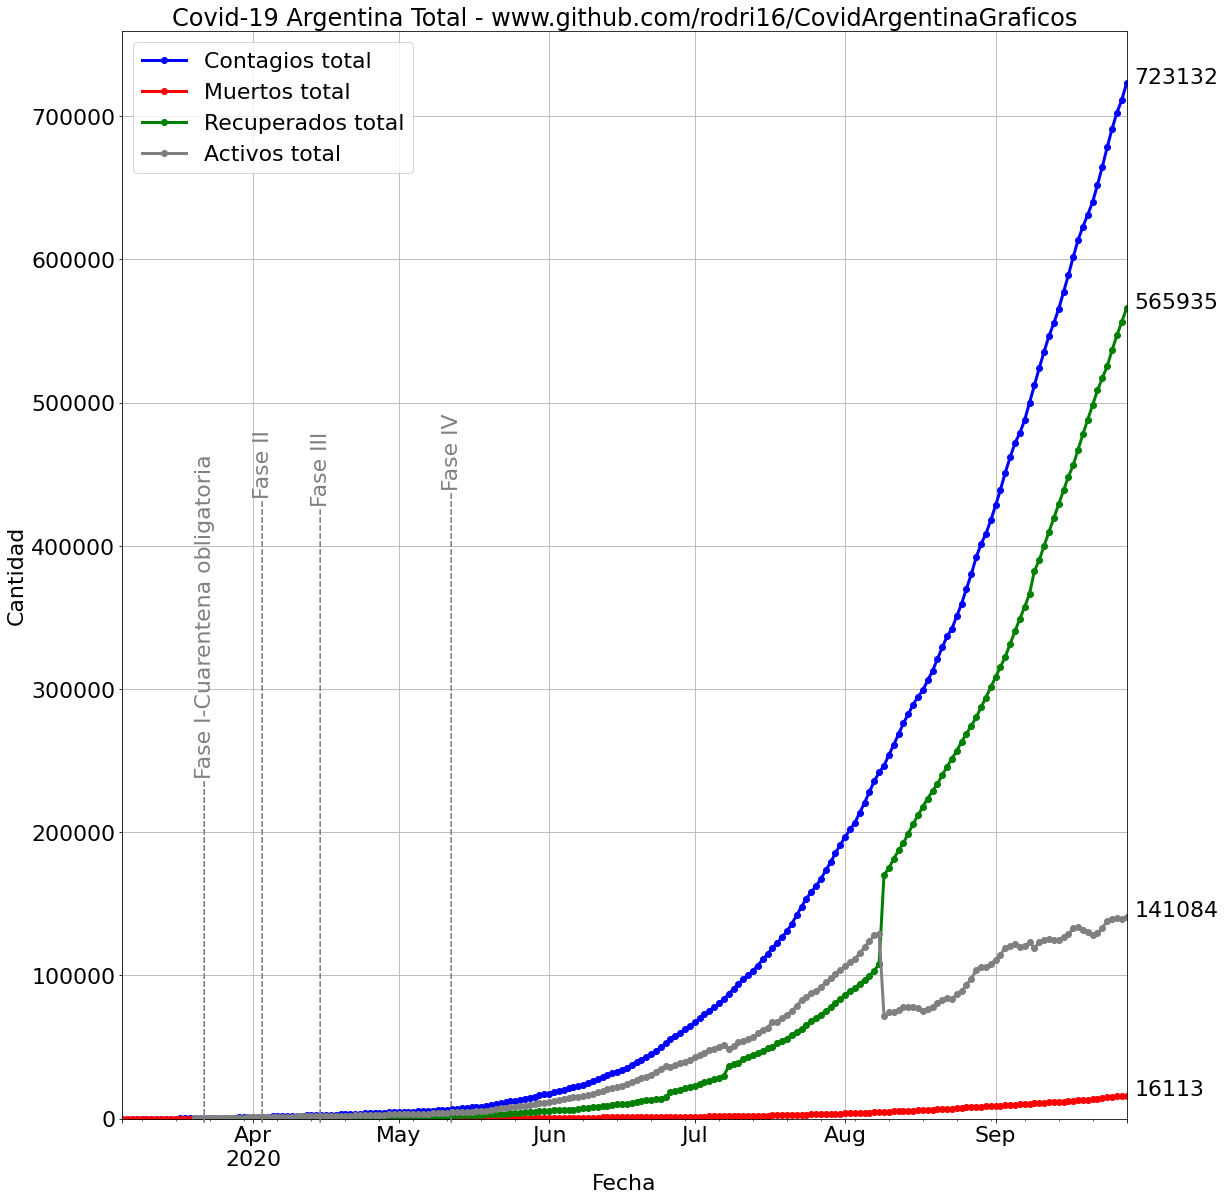

In [253]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Muertos_tot','Recuperados_tot',"Activos_tot"],color=['blue','red',"green",'grey'],fontsize=22, style='-',grid='on',figsize=(18,20),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.xlabel('Fecha', fontsize=22)
plt.ylabel('Cantidad', fontsize=22)
plt.legend(['Contagios total','Muertos total','Recuperados total',"Activos total"],loc='upper left', fontsize=22);
#ax.text('2020-4-2',5800,'www.github.com/rodri16/CovidArgentinaGraficos',fontsize=10)

#agrega ultimo valor
for var in (df.Contagios_tot,df.Muertos_tot,df.Recuperados_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22)

plt.annotate('%d' % df.Activos_tot.iloc[-1], xy=(1, df.Activos_tot.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22)   
# Add labels to the plot
style = dict(size=22, color='gray')

#Texto de la cuarentena obligatoria
ax.text('2020-3-20', 10, "-------------------------------------------Fase I-Cuarentena obligatoria",rotation=90, **style)
#Texto de la Fase II
ax.text('2020-4-1', 10, "------------------------------------------------------------------------------Fase II",rotation=90, **style)
#Texto de la Fase III
ax.text('2020-4-13', 10, "-----------------------------------------------------------------------------Fase III",rotation=90, **style)
#Texto de la Fase IV
ax.text('2020-5-10', 10, "-------------------------------------------------------------------------------Fase IV",rotation=90, **style)

#ax.set_facecolor("black")
#valor minimo en y = 0
plt.gca().set_ylim(bottom=0)

name='Graficos/Septiembre/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name, bits=16)

### Subplots

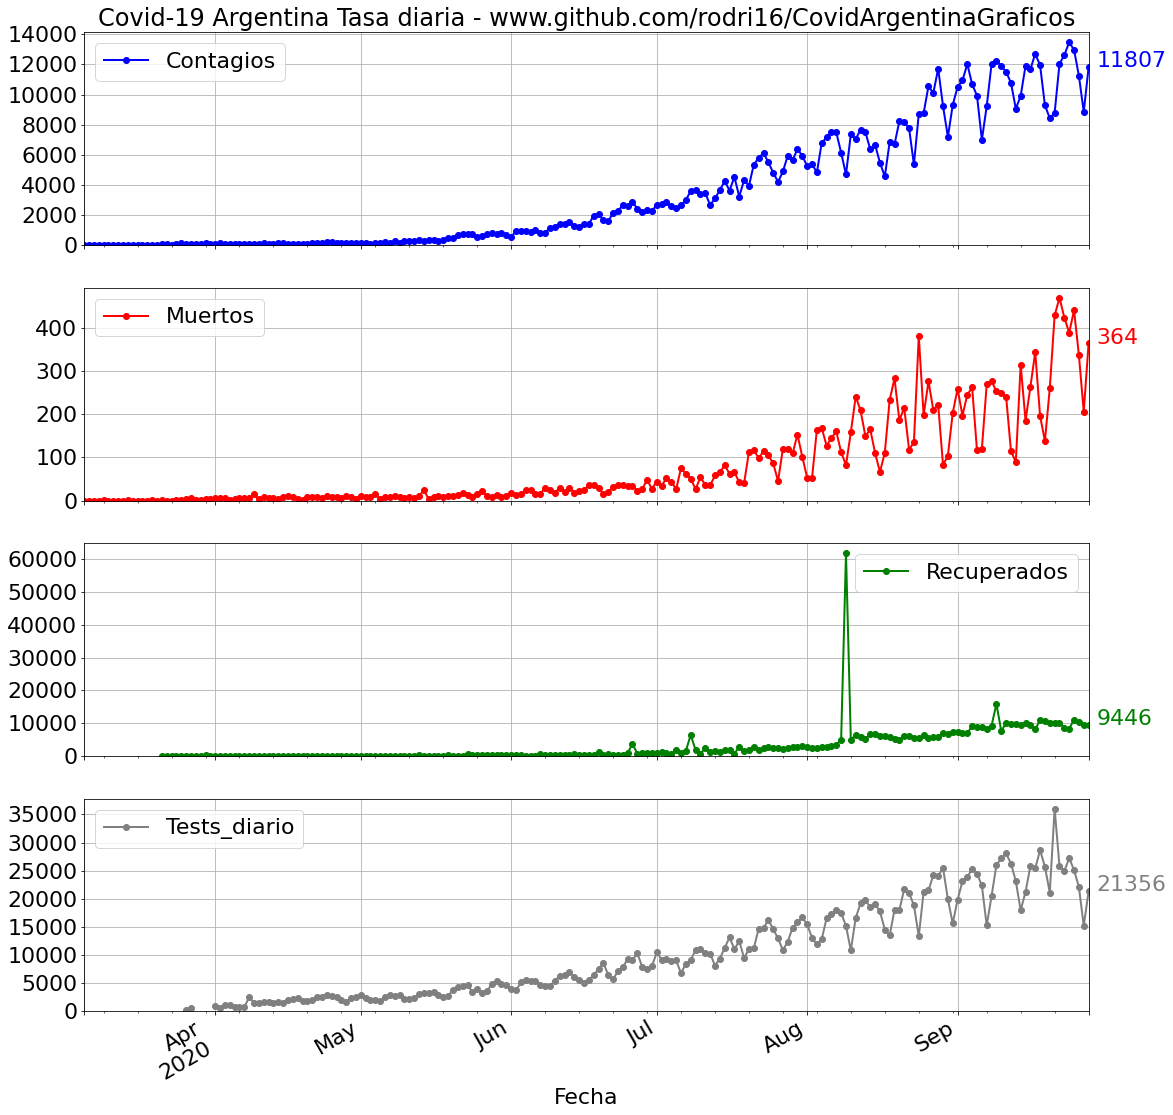

In [254]:
ax=df.plot(y=['Contagios','Muertos','Recuperados','Tests_diario'],color=['blue','red',"green",'grey'],figsize=(18,20),subplots='true',style='.-',grid='on',linewidth=2, marker='o', fontsize=22)#df[df['Contagios_tot'] > 100]
plt.xlabel('Fecha', fontsize=22)

ax[0].set_title('Covid-19 Argentina Tasa diaria - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)

ax[0].annotate('%d' % df.Contagios.iloc[-1], xy=(1, df.Contagios.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue")  
ax[0].set_ylim(bottom=0)
ax[0].legend(fontsize=22)

ax[1].annotate('%d' % df.Muertos.iloc[-1], xy=(1, df.Muertos.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="red") 
ax[1].set_ylim(bottom=0)
ax[1].legend(fontsize=22)

ax[2].annotate('%d' % df.Recuperados.iloc[-1], xy=(1, df.Recuperados.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="green") 
ax[2].set_ylim(bottom=0)
ax[2].legend(fontsize=22)


ax[3].annotate('%d' % df.Tests_diario.iloc[-1], xy=(1, df.Tests_diario.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey") 
ax[3].set_ylim(bottom=0)
ax[3].legend(fontsize=22)

name='Graficos/Septiembre/Todos_diario_sub_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Grafico de totales igual al anterior pero en escala logaritmica, se pueden ver un poco mejor lo valores chicos con respecto a los grandes pero es un poco tricky

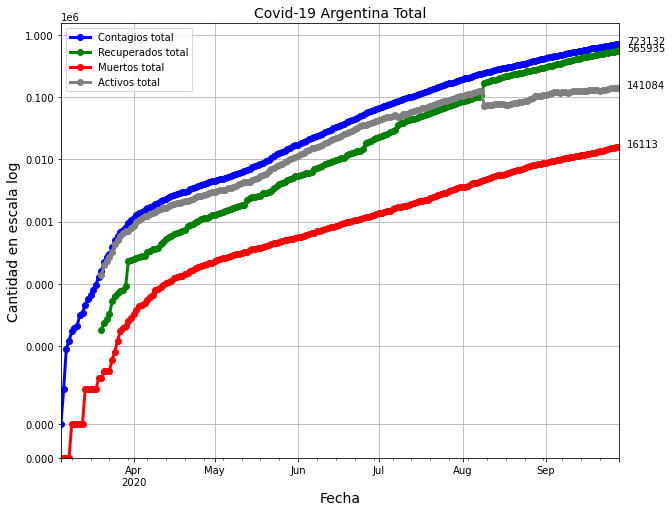

In [255]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot"],color=['blue',"green",'red','grey'],logy="sym", style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad en escala log', fontsize=14)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total"],loc='upper left');
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.gca().set_ylim(bottom=0)

name='Graficos/Contagios_tot_log'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Agrego los test en escala logaritmica, aca se pueden ver todos los datos juntos gracias a la escala log

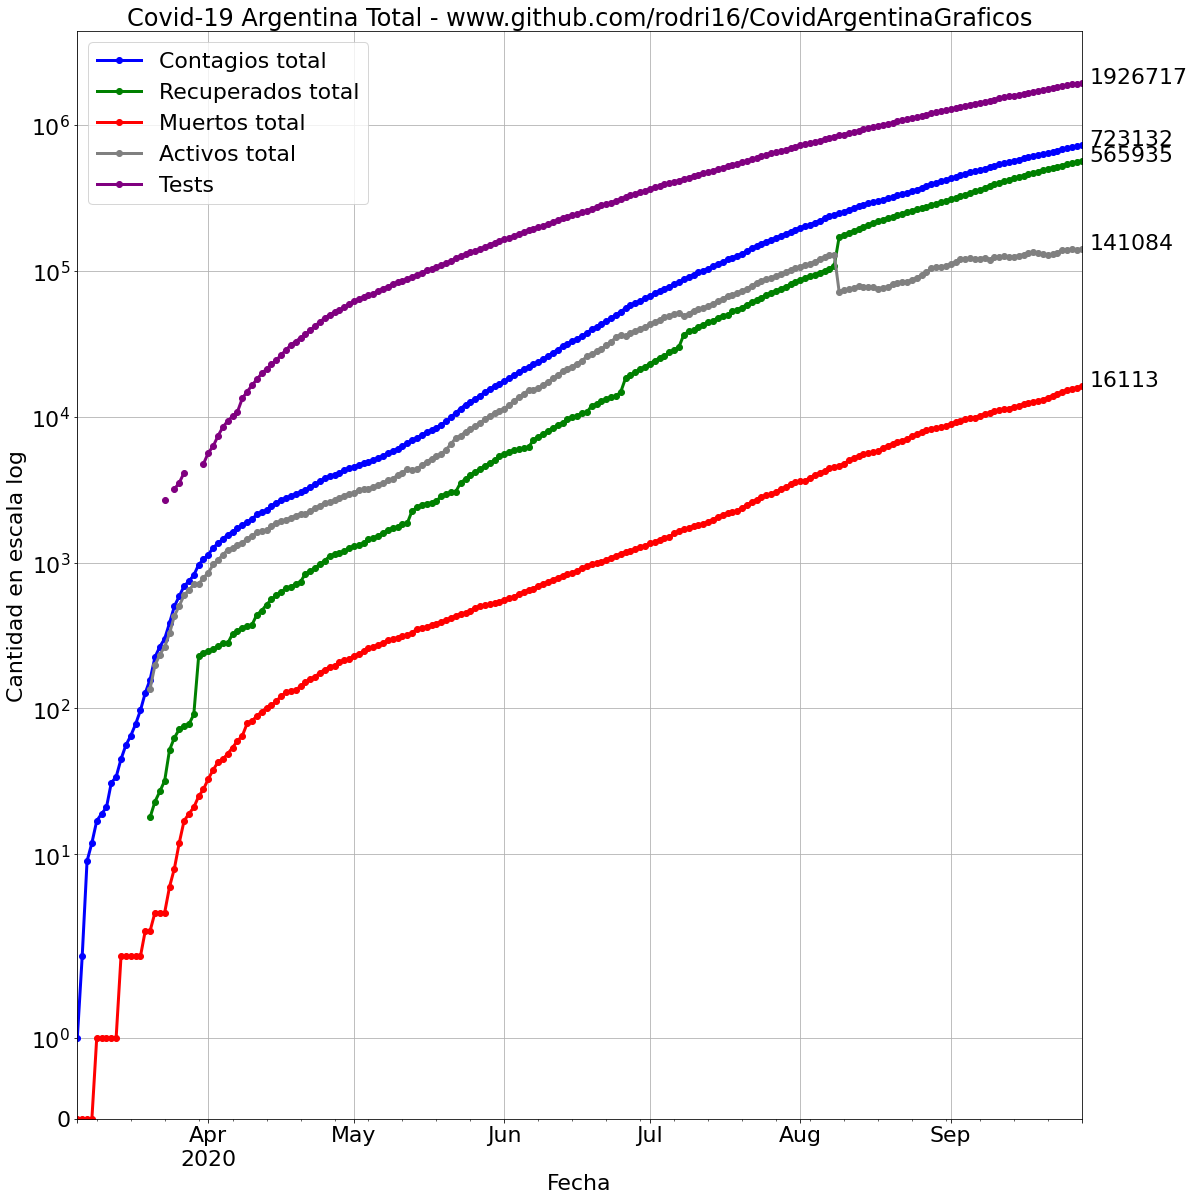

In [256]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot","Tests"],color=['blue',"green",'red','grey','purple'],logy="sym", style='-',grid='on',figsize=(18,20),fontsize=22,linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.xlabel('Fecha', fontsize=22)
plt.ylabel('Cantidad en escala log', fontsize=22)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total","Tests"],loc='upper left', fontsize=22);
#ax.yaxis.set_major_formatter(mticker.ScalarFormatter())


for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot,df.Tests):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points', fontsize=22)

plt.gca().set_ylim(bottom=0)

name='Graficos/Septiembre/Contagios_totTests_log'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Asi sin escala log, se ve la diferencia!!

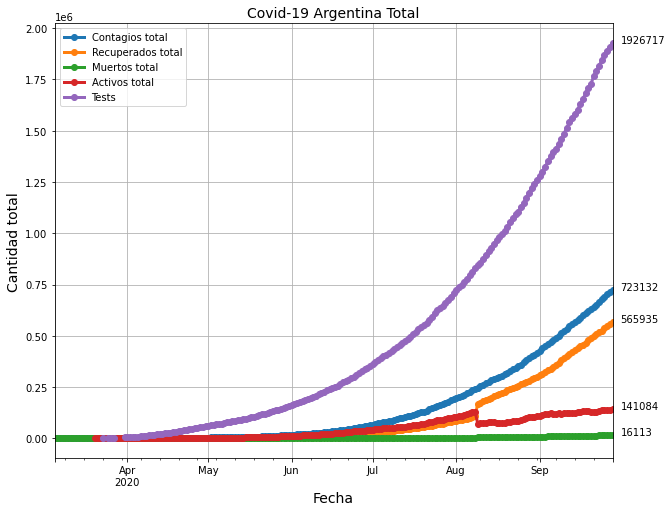

In [257]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot","Tests"], style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad total', fontsize=14)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total","Tests"],loc='upper left');
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot,df.Tests):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')


### Grafico de barras del total de contagios y activos

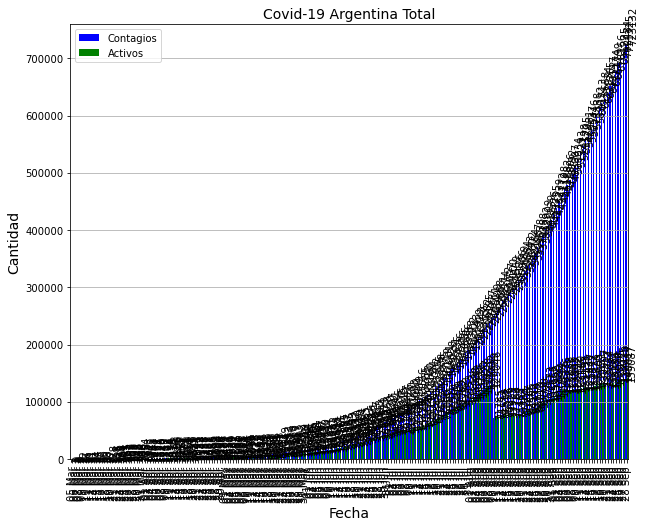

In [258]:
ax=df.plot.bar(y=['Contagios_tot','Activos_tot'],color=['blue','green'],figsize=(10,8),width=0.9)
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df.index.to_series().dt.strftime("%d %b")))

plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend(['Contagios', "Activos"],loc='upper left');
plt.grid(axis='y')

#numeros arriba de la barra
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=90)

name='Graficos/Contagios_totBar_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Subplots

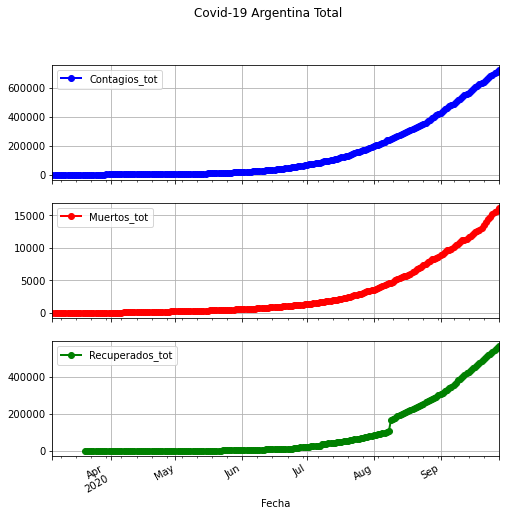

In [259]:
df.plot(y=['Contagios_tot','Muertos_tot', 'Recuperados_tot'],color=['blue','red','green'],figsize=(8,8),subplots='true',style='.-',grid='on',title='Covid-19 Argentina Total',linewidth=2, marker='o')#df[df['Contagios_tot'] > 100]

name='Graficos/Contagios_tot100_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

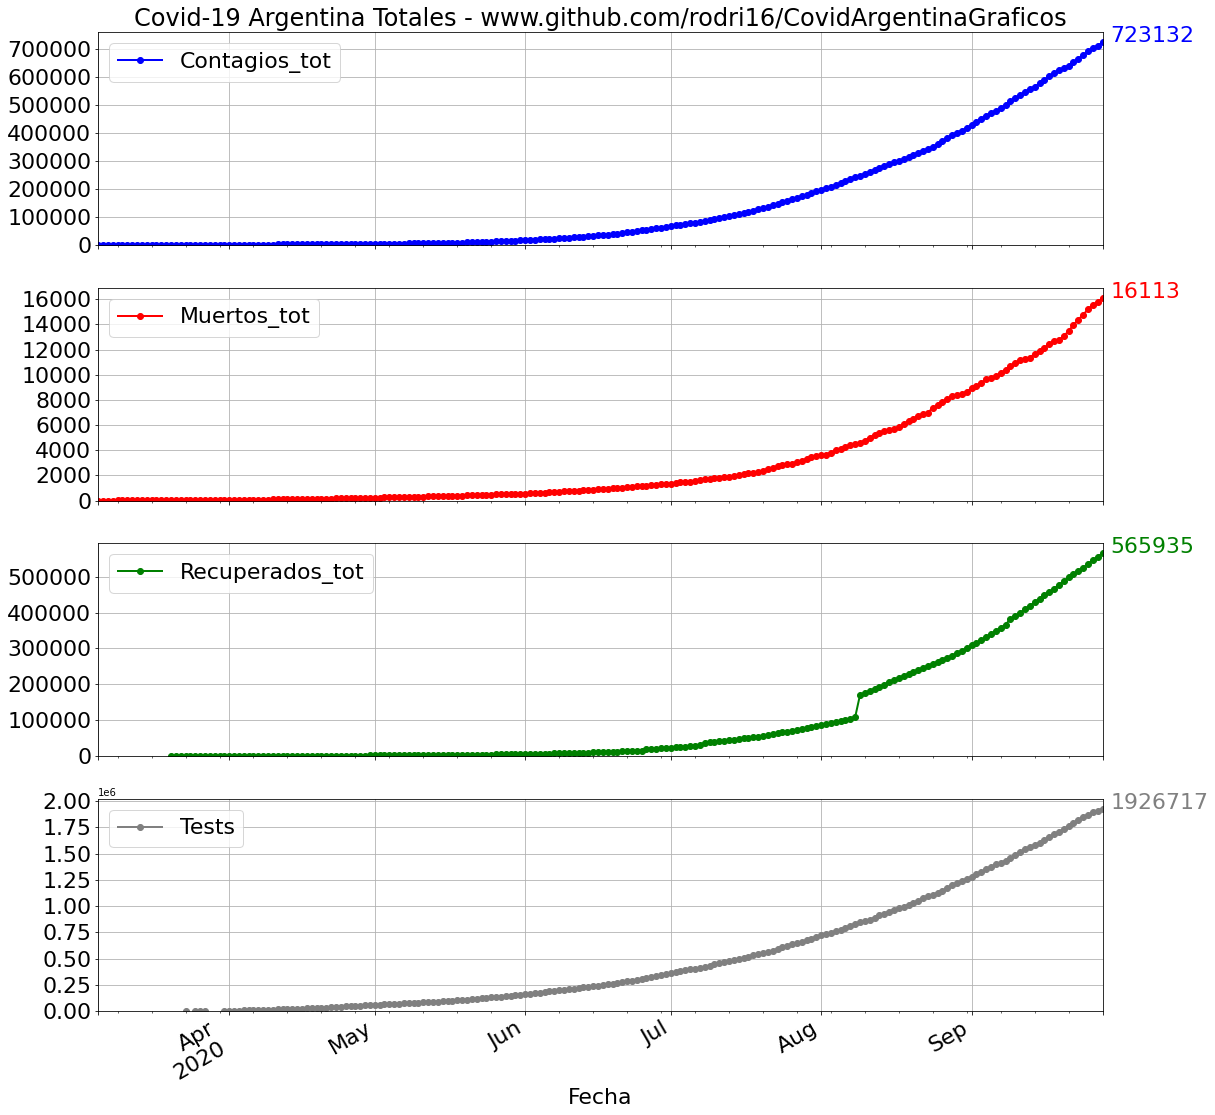

In [260]:
ax=df.plot(y=['Contagios_tot','Muertos_tot', 'Recuperados_tot',"Tests"],color=['blue','red','green','grey'],figsize=(18,20),subplots='true',style='.-',grid='on',linewidth=2, marker='o',fontsize=22)#df[df['Contagios_tot'] > 100]

plt.xlabel('Fecha', fontsize=22)

ax[0].set_title('Covid-19 Argentina Totales - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)

ax[0].annotate('%d' % df.Contagios_tot.iloc[-1], xy=(1, df.Contagios_tot.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue")  
ax[0].set_ylim(bottom=0)
ax[0].legend(fontsize=22)

ax[2].annotate('%d' % df.Recuperados_tot.iloc[-1], xy=(1, df.Recuperados_tot.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="green") 
ax[2].set_ylim(bottom=0)
ax[2].legend(fontsize=22)

ax[1].annotate('%d' % df.Muertos_tot.iloc[-1], xy=(1, df.Muertos_tot.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="red") 
ax[1].set_ylim(bottom=0)
ax[1].legend(fontsize=22)

ax[3].annotate('%d' % df.Tests.iloc[-1], xy=(1, df.Tests.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey") 
ax[3].set_ylim(bottom=0)
ax[3].legend(fontsize=22)
name='Graficos/Septiembre/Todos_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico en escala log

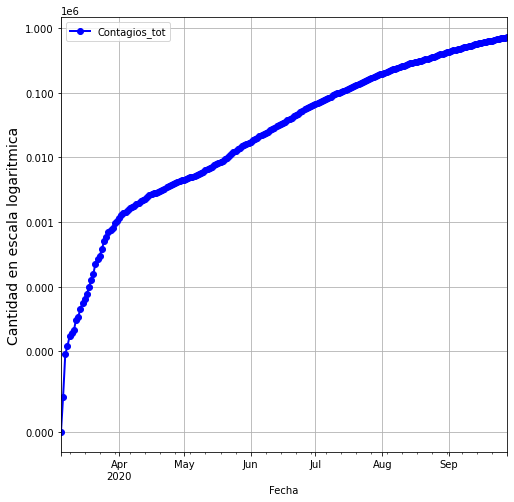

In [261]:
ax=df.plot(y=['Contagios_tot'],color=['blue'],figsize=(8,8),style='.-',grid='on',linewidth=2,logy="sym", marker='o')#df[df['Muertos_tot'] > 10]
plt.ylabel('Cantidad en escala logaritmica', fontsize=14)
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

name='Graficos/Contagios_tot_log_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

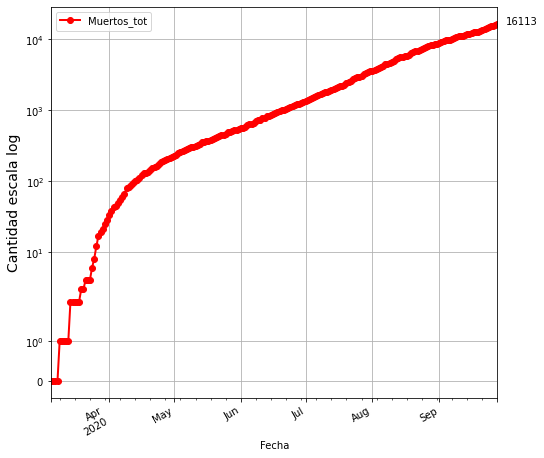

In [262]:
ax=df.plot(y=['Muertos_tot'],color=['red'],figsize=(8,8),subplots='true',style='.-',grid='on',logy="sym",linewidth=2, marker='o')#df[df['Muertos_tot'] > 10]
plt.ylabel('Cantidad escala log', fontsize=14)
plt.annotate('%d' % df.Muertos_tot.max(), xy=(1, df.Muertos_tot.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
name='Graficos/Muertos_tot10_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

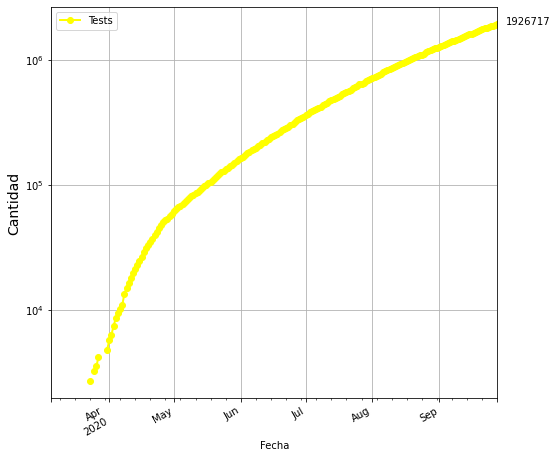

In [263]:
ax=df.plot(y=['Tests'],color=['yellow'],figsize=(8,8),subplots='true',style='.-',grid='on',logy="sym",linewidth=2, marker='o')#df[df['Muertos_tot'] > 10]
plt.ylabel('Cantidad', fontsize=14)
plt.annotate('%d' % df.Tests.max(), xy=(1, df.Tests.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
name='Graficos/Test_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Como quedo la tabla

In [264]:
df.describe()

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot
count,208,208,193,186,192,183,192,208,208,193
mean,"3,477",77,"105,240","551,080","2,947","10,508",734,"146,563","3,046","49,429"
std,"3,987",105,"157,736","556,907","5,507","8,280","4,452","201,275","4,198","47,893"
min,1,0,18,"2,695",1,328,"-57,261",1,0,137
25%,140,7,"1,601","88,211",60,"2,876",82,"3,864",190,"3,488"
50%,"1,462",26,"13,816","332,994",688,"8,487",696,"34,856",896,"34,920"
75%,"6,192",115,"181,389","906,651","5,243","16,636","1,780","237,210","4,439","88,873"
max,"13,467",470,"565,935","1,926,717","61,867","36,029","5,788","723,132","16,113","141,084"


## Meto todos los datos de la tabla en un archivo .csv  con la fecha

In [265]:
name='csv _datos_completos/Septiembre/Covid_arg_completo'+df.index[-1].strftime("%d%b")+'.csv'#str(df.index[-1])
df.to_csv(name, index=True)

### Probando interpolaciones...

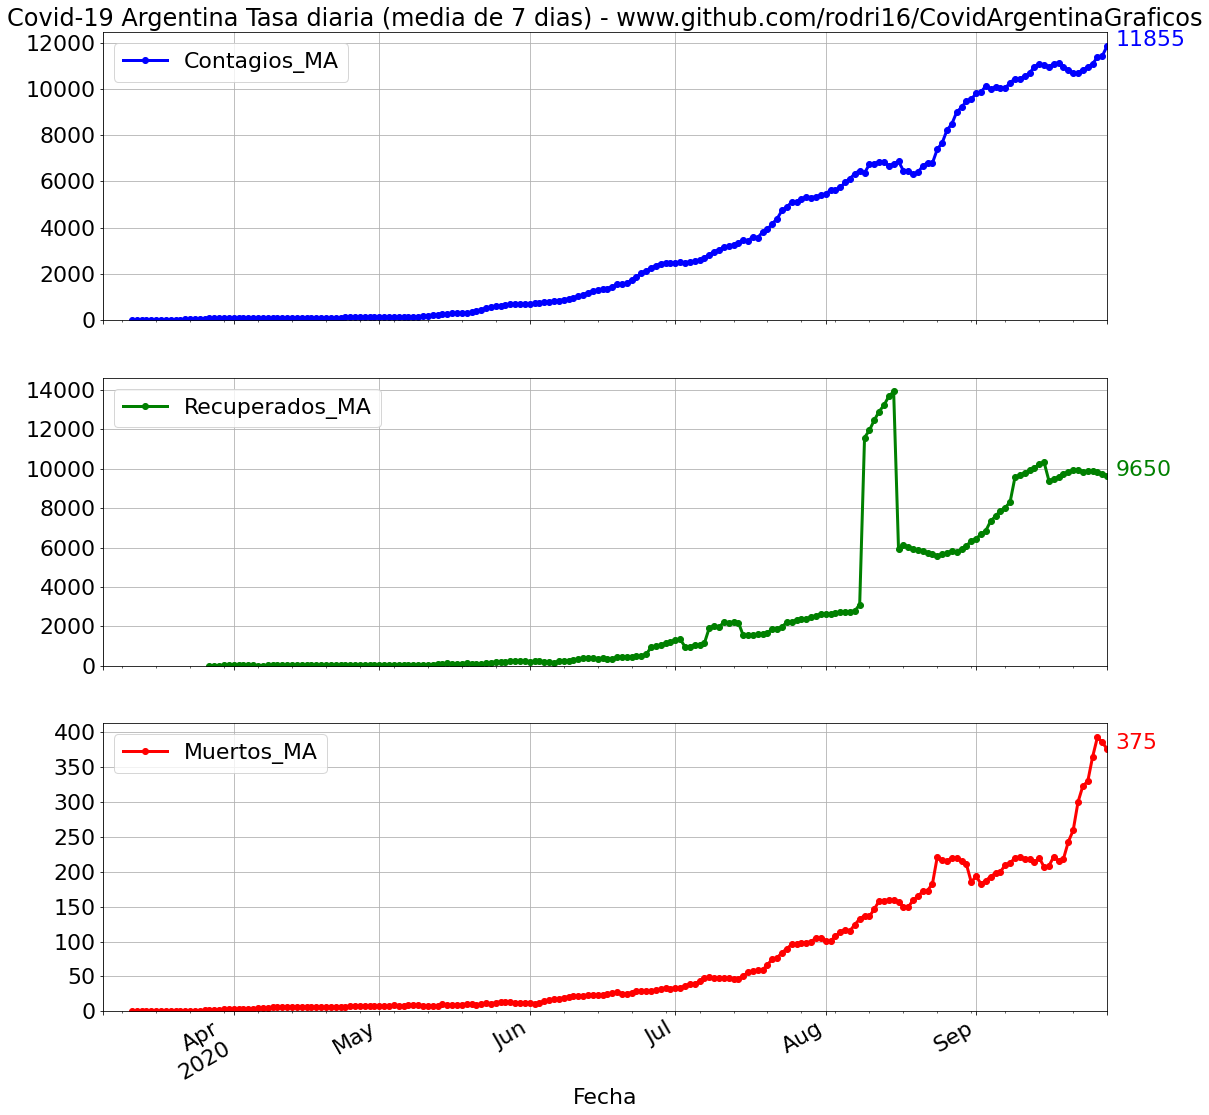

In [266]:
import numpy as np
N=7
df["Contagios_MA"]=df.Contagios.rolling(window=N).mean()
df["Recuperados_MA"]=df.Recuperados.rolling(window=N).mean()
df["Muertos_MA"]=df.Muertos.rolling(window=N).mean()
df["Tests_diario_MA"]=df.Tests_diario.rolling(window=N).mean()
ax=df.plot(y=['Contagios_MA','Recuperados_MA','Muertos_MA'],color=['blue','green','red'],subplots='true',fontsize=22, legend='true',style='-',grid='on',figsize=(18,20),linewidth=3, marker='o') 

plt.xlabel('Fecha', fontsize=22)

ax[0].set_title('Covid-19 Argentina Tasa diaria (media de 7 dias) - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)

ax[0].annotate('%d' % df.Contagios_MA.iloc[-1], xy=(1, df.Contagios_MA.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue")  
ax[0].set_ylim(bottom=0)
ax[0].legend(fontsize=22)

ax[1].annotate('%d' % df.Recuperados_MA.iloc[-1], xy=(1, df.Recuperados_MA.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="green") 
ax[1].set_ylim(bottom=0)
ax[1].legend(fontsize=22)

ax[2].annotate('%d' % df.Muertos_MA.iloc[-1], xy=(1, df.Muertos_MA.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="red") 
ax[2].set_ylim(bottom=0)
ax[2].legend(fontsize=22)

#plt.title('Covid-19 Argentina Tasa diaria (media de 7 dias)',fontsize=14)
#plt.legend(['Contagios', 'Recuperados',"Muertos"],loc='upper left');
#plt.ylabel('Cantidad', fontsize=14)
#ax.set_facecolor("black")

name='Graficos/Septiembre/TasaDiariaMA_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Relacion entre nuevos contagios y gente testeada

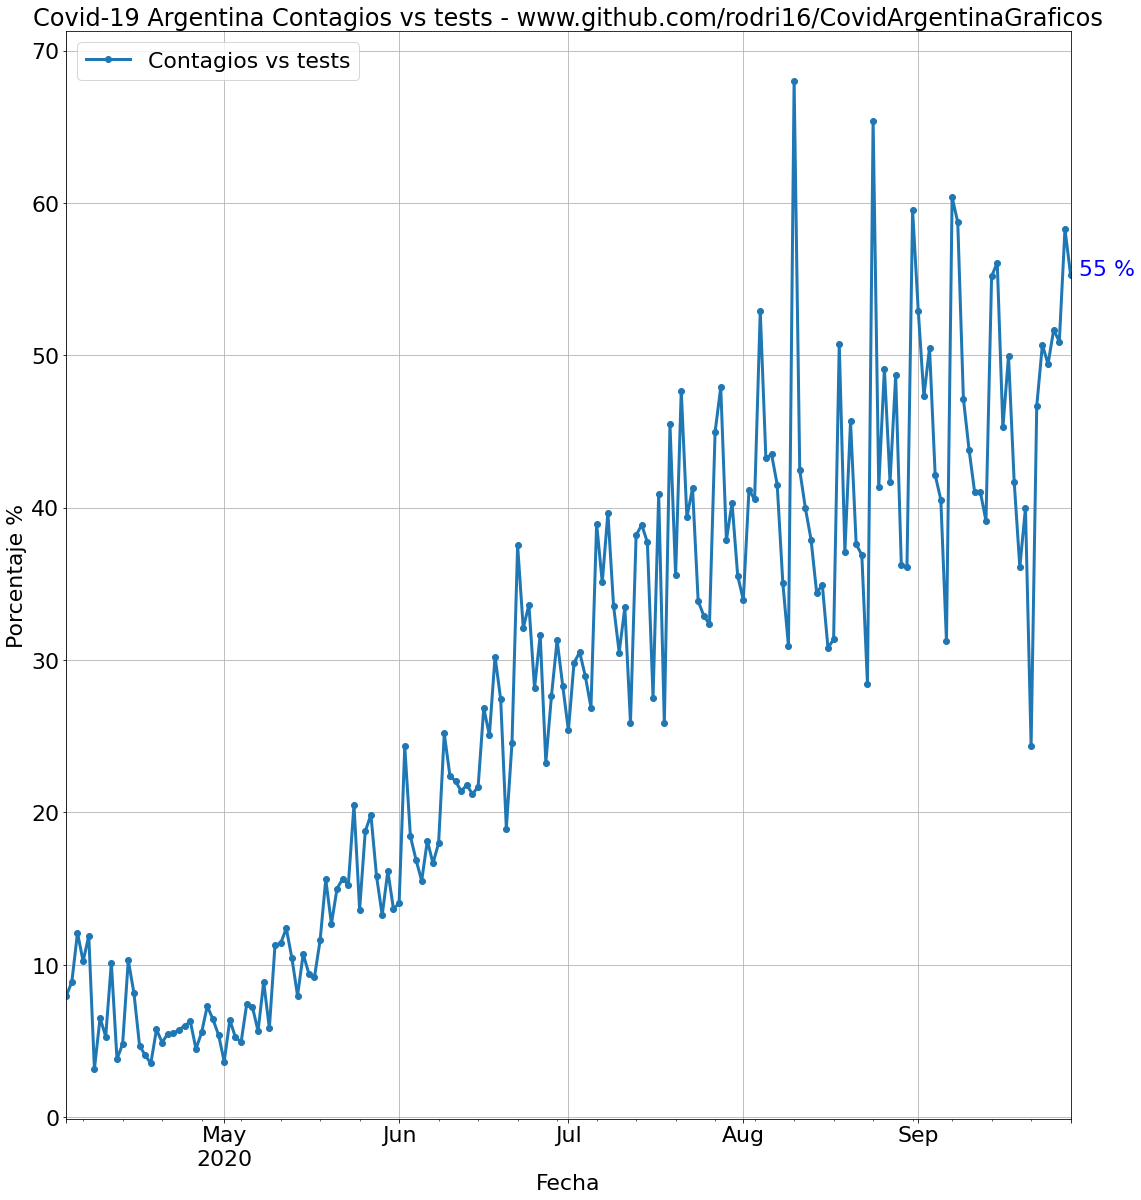

In [267]:
df['cont_test']=df['Contagios']/df['Tests_diario']*100
df[df.index > '2020-4-2']['cont_test'].plot(legend='true',style='-',grid='on',figsize=(18,20),linewidth=3, marker='o', fontsize=22)
plt.title('Covid-19 Argentina Contagios vs tests - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.legend(['Contagios vs tests'],loc='upper left', fontsize=22);
plt.ylabel('Porcentaje %', fontsize=22)
plt.xlabel('Fecha',fontsize=22)
plt.annotate('%d %%' % df.cont_test.iloc[-1], xy=(1, df.cont_test.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue") 

name='Graficos/Septiembre/Tasa_Cont_Test'+df.index[-1].strftime("%d%b")#+'.svg'#str(df.index[-1])+'.eps'
plt.savefig(name)

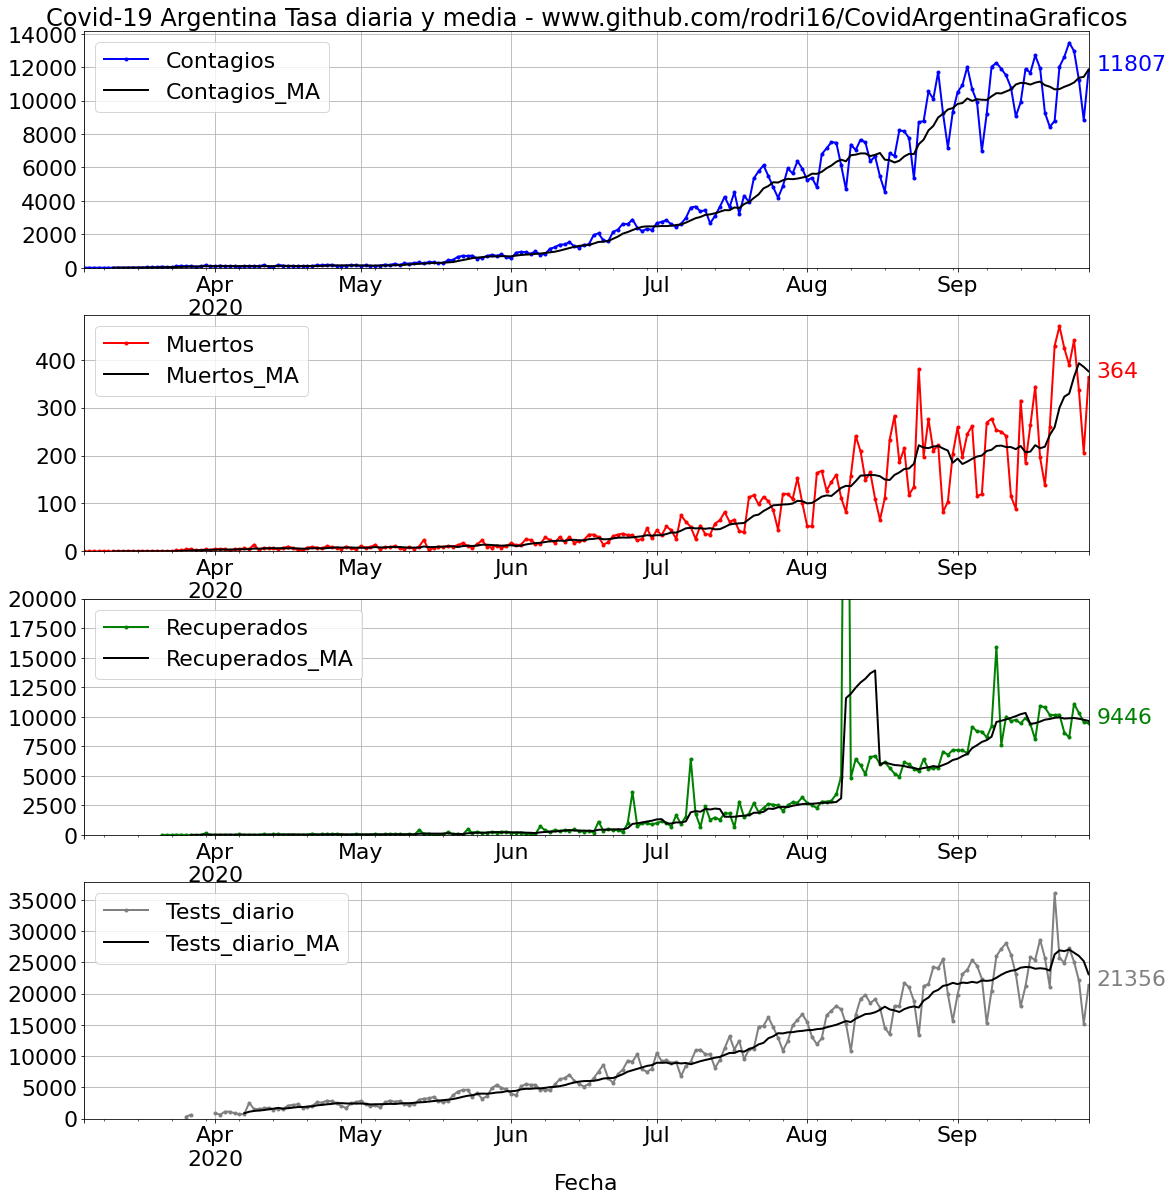

In [268]:
fig, axs = plt.subplots(4,1)

#ax=df.plot(y=['Contagios','Contagios_MA','Muertos','Recuperados','Tests_diario'],color=['blue','red',"green",'grey'],figsize=(18,20),subplots='true',style='.-',grid='on',linewidth=2, marker='o', fontsize=22)#df[df['Contagios_tot'] > 100]
plt.xlabel('Fecha', fontsize=22)

df.plot(y=['Contagios','Contagios_MA'],color=['blue','black'],figsize=(18,20),style=['.-',''],grid='on',linewidth=2, fontsize=22,ax=axs[0])
axs[0].set_title('Covid-19 Argentina Tasa diaria y media - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)

axs[0].annotate('%d' % df.Contagios.iloc[-1], xy=(1, df.Contagios.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue")  
axs[0].set_ylim(bottom=0)
axs[0].legend(fontsize=22)

df.plot(y=['Muertos','Muertos_MA'],color=['red','black'],figsize=(18,20),style=['.-','-'],grid='on',linewidth=2, fontsize=22,ax=axs[1])
axs[1].annotate('%d' % df.Muertos.iloc[-1], xy=(1, df.Muertos.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="red") 
axs[1].set_ylim(bottom=0)
axs[1].legend(fontsize=22)


df.plot(y=['Recuperados','Recuperados_MA'],color=['green','black'],figsize=(18,20),style=['.-','-'],grid='on',linewidth=2, fontsize=22,ax=axs[2])
axs[2].annotate('%d' % df.Recuperados.iloc[-1], xy=(1, df.Recuperados.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="green") 
axs[2].set_ylim(bottom=0,top=20000)
axs[2].legend(fontsize=22)

df.plot(y=['Tests_diario','Tests_diario_MA'],color=['grey','black'],figsize=(18,20),style=['.-','-'],grid='on',linewidth=2, fontsize=22,ax=axs[3])

axs[3].annotate('%d' % df.Tests_diario.iloc[-1], xy=(1, df.Tests_diario.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey") 
axs[3].set_ylim(bottom=0)
axs[3].legend(fontsize=22)

name='Graficos/Septiembre/TasaDiaria_MA_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

In [269]:
df.tail(5)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot,Contagios_MA,Recuperados_MA,Muertos_MA,Tests_diario_MA,cont_test
Fecha,,,,,,,,,,,,,,,
2020-09-24,13467,389,"525,486","1,842,991","8,258","27,253","4,820",678266,14765,"138,015","10,936","9,877",329,"27,054",49
2020-09-25,12969,441,"536,589","1,868,089","11,103","25,098","1,425",691235,15206,"139,440","11,082","9,900",364,"26,549",52
2020-09-26,11249,337,"546,924","1,890,190","10,335","22,101",577,702484,15543,"140,017","11,364","9,835",393,"26,035",51
2020-09-27,8841,206,"556,489","1,905,361","9,565","15,171",-930,711325,15749,"139,087","11,423","9,751",385,"25,189",58
2020-09-28,11807,364,"565,935","1,926,717","9,446","21,356","1,997",723132,16113,"141,084","11,855","9,651",376,"23,093",55
